In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data set

#### since data in the form of excel format we have to use pandas read_excel to read the data
#### after loading the data it is very important to check the complete imformation of given data it can be incidates many of hidden values and missing values in a columns and rows

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option("display.max_column" , None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
42h 5m       1
13h 35m      1
3h 25m       1
47h 40m      1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA
1 from description we can see that date_of_journey is a object data type
therefore , we have to convert this datatype to timestamp so as to use columns properly for predicition

for this we require pandas to_datetime to convert object datatype to datetime dtype



.dt.date method will only extract day of the date

.dt.month method will only extract day of the month

In [10]:
train_data["journey_day"] = pd.to_datetime(train_data.Date_of_Journey , format="%d/%m/%Y").dt.day

In [11]:
train_data["journey_month"] = pd.to_datetime(train_data["Date_of_Journey"] , format="%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
# Since we have converted Dare_of_joureny into integers , Now we can drop as it is 

train_data.drop(["Date_of_Journey"], axis=1 , inplace = True)

In [14]:
# Depature times is when a plan leaves the gate
# similary like Date_of_Journey we can extract values from deep

# Extracting Hours
train_data["Dep_Hours"] = pd.to_datetime(train_data.Dep_Time).dt.hour

#Extracting Minutes
train_data["Dep_mins"] = pd.to_datetime(train_data.Dep_Time).dt.minute

In [15]:
# now we can drop Dep_time

train_data.drop(["Dep_Time"], axis=1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hours,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
# arrival time is when the plane full the gate
# similary like Date_of_Journey we can extract values from deep

# Extracting hours
train_data["arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

#extracting minutues
train_data["arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [18]:
# now we can drop Arrival colums 
train_data.drop(["Arrival_Time"], axis=1 , inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
# Time taken by plame to reach distination called duration
# it is the difference between arrival time and dep_time

# assigning and converting duration column in list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:          #check if duration contains only h and mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"      #Add 0 mins
        else:
            duration[i] = "0h" + duration[i]              # Add 0 hours
            
            
duration_hour = []
duration_mins = []    
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))                  #Extract from hours
#     duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))     #extract from the mins

In [21]:
train_data["duration_hour"] = duration_hour

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4


In [23]:
train_data.drop(["Duration"] , axis=1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4


# Handling Categoraical Data


one can find many ways to find categorical data. Some of the categorcal data are

1. Nominal data - data are not in order --> OnehotEncoding is used in this case
2. Order Data - data are in order --> Label Encoding is used in this case

In [25]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

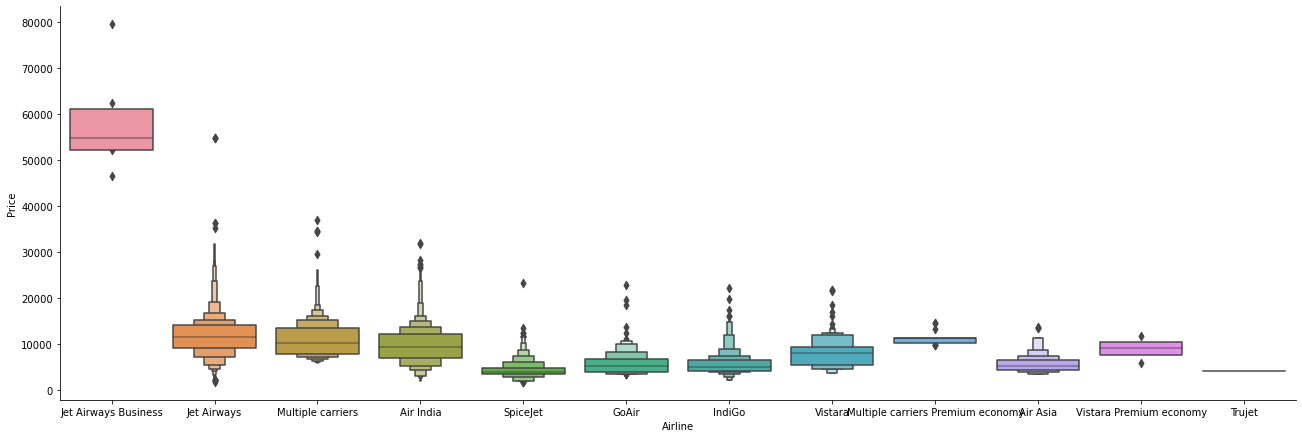

In [26]:
# from grapgh we can see that jet airways  business have the highest Price

# Airline vs Price
sns.catplot(y= "Price" , x="Airline" , data = train_data.sort_values("Price" , ascending= False) , kind="boxen" , height=6 , aspect =3)
plt.show()

In [27]:
# As airline as a nominal catgorical data we perform ONEHOTENCODING

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline , drop_first=True)



In [28]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

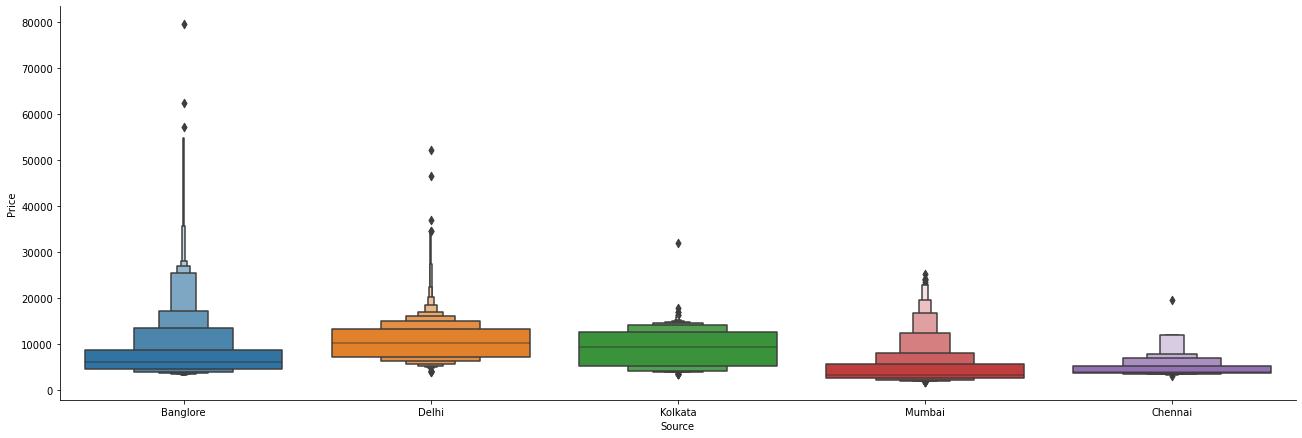

In [30]:
# source vs Price

sns.catplot(y = "Price" , x="Source" , data=train_data.sort_values("Price" , ascending=False) , kind = "boxen" , height=6, aspect = 3)
plt.show()

In [31]:
source = train_data[["Source"]]

source = pd.get_dummies(source , drop_first=True)

In [32]:
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
destination = train_data[["Destination"]]

destination = pd.get_dummies(destination , drop_first=True)

In [35]:
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
train_data.drop(["Route" , "Additional_Info"] , axis=1 , inplace = True)

In [38]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min,duration_hour
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4


In [39]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
# As in this Case of Ordinal Categorical Type we perform Label Encoding
# here values are assigned as corresonding keys

train_data.replace({"non-stop":0 , "1 stop": 1 , "2 stops": 2 , "3 stops":3 , "4 stops": 4}, inplace = True)

In [41]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min,duration_hour
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4


In [42]:
# concatnate dataframe ---> train_data + Airlines + source + destination

data_train = pd.concat([train_data , Airline , source , destination] , axis= 1)

In [43]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
data_train.drop(["Airline", "Source", "Destination"] , axis= 1 , inplace = True)

In [45]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
data_train.shape

(10682, 29)

# test data

In [47]:
test_data = pd.read_excel("Test_set.xlsx")

In [48]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1,  "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [50]:
data_test.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature Selection

fining out the best feature selection will be contribute and have a good relation with target varaiable
following are some of the feature selecetion methods

1.Heatmap
2.feature_importance
3.selectKBest

In [51]:
data_train.shape

(10682, 29)

In [52]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_Hours',
       'Dep_mins', 'arrival_hour', 'arrival_min', 'duration_hour',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [53]:
X = data_train.loc[:, ['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_Hours',
       'Dep_mins', 'arrival_hour', 'arrival_min', 'duration_hour',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [54]:
X.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Hours,Dep_mins,arrival_hour,arrival_min,duration_hour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

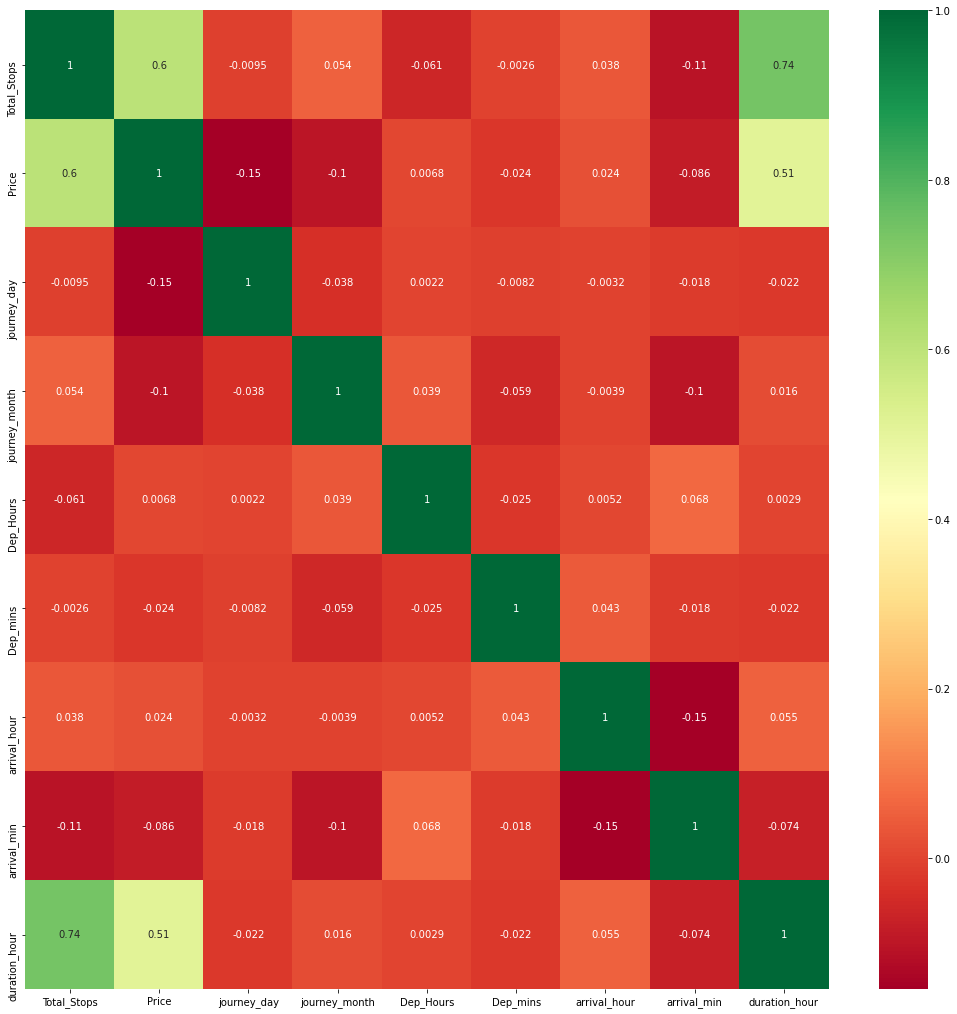

In [56]:
# find correlection between independent and dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot = True , cmap = "RdYlGn")
plt.show()

In [57]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[1.35694387e-01 6.11702945e-01 2.44941424e-03 1.55863029e-03
 2.60093644e-04 1.27532093e-04 3.84381011e-04 1.48926042e-04
 6.45477065e-02 1.47821054e-03 5.88777432e-05 6.17472623e-03
 1.05521888e-01 3.55096048e-02 3.43031162e-03 1.00777314e-05
 3.93209054e-04 1.29867880e-08 2.59461561e-04 4.82058484e-07
 2.04100242e-05 3.94723932e-03 4.53183272e-04 2.06341411e-03
 7.25446610e-03 1.08564791e-02 1.47012241e-03 1.64796994e-05
 4.20732711e-03]


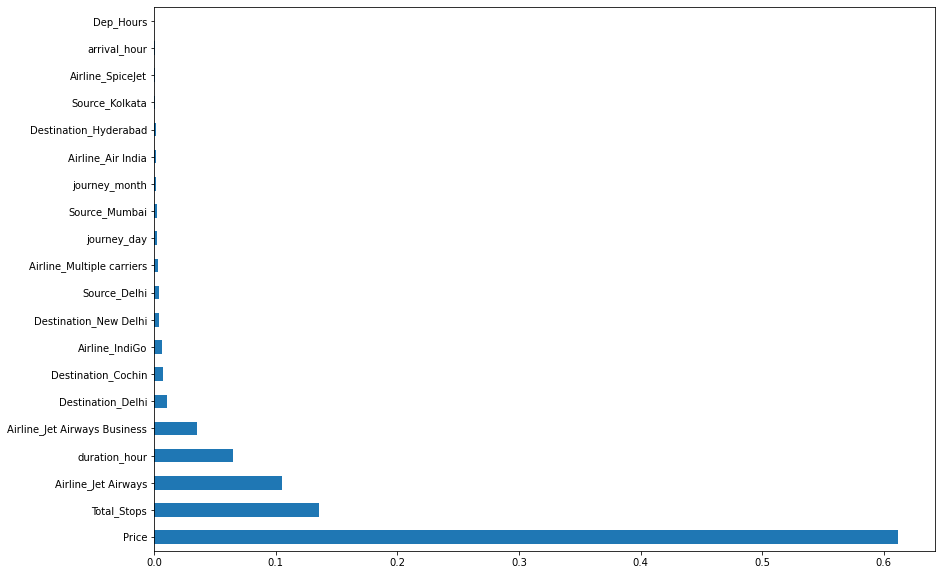

In [74]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (14,10))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using random forest

split data into train and test to predict
 
if needed to scaling of the data

import model

fit the data

and then predict

in regression check RSME Score

and plot

In [60]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size=0.2)

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
model = RandomForestRegressor()
model.fit(x_train ,y_train)

RandomForestRegressor()

In [63]:
y_predict = model.predict(x_test)

In [64]:
model.score(x_train , y_train)

0.9994379697862279

In [65]:
model.score(x_test , y_test)

0.9999898640061337

C:\Users\shail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

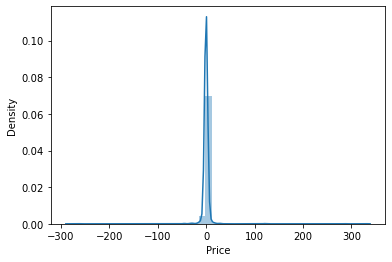

In [66]:
sns.distplot(y_test - y_predict)

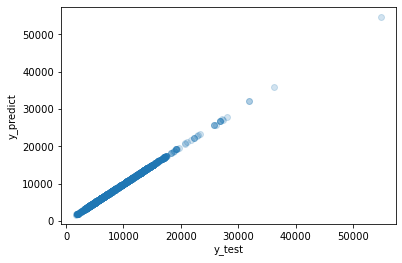

In [67]:
plt.scatter(y_test , y_predict , alpha = 0.2)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

In [68]:
from sklearn import metrics

In [69]:
print("MAS:" , metrics.mean_absolute_error(y_test , y_predict))
print("MSE:" , metrics.mean_squared_error(y_test , y_predict))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test , y_predict)))

MAS: 1.943584464202161
MSE: 201.56990126345292
RMSE: 14.197531520072527


In [70]:
metrics.r2_score(y_test , y_predict)

0.9999898640061337